# Road Safety Analysis

## The CRISP-DM Methodology

The Cross-Industry Standard Process for Data Mining (CRISP-DM) is a
widely-used, open standard process model that describes common
approaches used by data mining experts. It provides a structured
approach to planning a data mining project. The CRISP-DM methodology is
divided into six major phases:

1.  **Business Understanding:** This initial phase focuses on
    understanding the project objectives and requirements from a
    business perspective. This knowledge is then converted into a data
    mining problem definition, and a preliminary plan is designed to
    achieve the objectives.
2.  **Data Understanding:** The data understanding phase starts with
    initial data collection and proceeds with activities to get familiar
    with the data, identify data quality problems, discover first
    insights, or detect interesting subsets to form hypotheses for
    hidden information.
3.  **Data Preparation:** This phase covers all activities to construct
    the final dataset (the data that will be fed into the modelling
    tool) from the initial raw data. Data preparation tasks are likely
    to be performed multiple times and not in any prescribed order.
    Tasks include table, record, and attribute selection, as well as
    transforming and cleaning data for the modelling tools.
4.  **Modelling:** In this phase, various modelling techniques are
    selected and applied, and their parameters are calibrated to optimal
    values. Typically, there are several techniques for the same data
    mining problem type. Some techniques have specific requirements on
    the form of data, so stepping back to the data preparation phase is
    often needed.
5.  **Evaluation:** At this stage, a model (or models) has been built
    that appears to have high quality from a data analysis perspective.
    Before proceeding to the final deployment, it is important to
    evaluate the model thoroughly and review the steps executed to
    construct it to be certain it properly achieves the business
    objectives. A key objective is to determine if there is any
    important business issue that has not been sufficiently considered.
    At the end of this phase, a decision on the use of the data mining
    results should be reached.
6.  **Deployment:** Creation of the model is generally not the end of
    the project. The knowledge gained will need to be organised and
    presented in a way that the customer can use it. Depending on the
    requirements, the deployment phase can be as simple as generating a
    report or as complex as implementing a repeatable data mining
    process. In many cases, it will be the customer, not the data
    analyst, who will carry out the deployment steps. However, it is
    important for the customer to understand up-front what actions will
    need to be carried out to make use of the created models.

## 1. Business Understanding

### 1.1 Business Problem

The project aims to analyse the road casualty statistics from the UK
Department for Transport to identify the main contributing factors to
road accidents and their severity. The insights from this project will
help in formulating recommendations for improving road safety and
reducing the number of accidents and casualties.

### 1.2 Business Objectives

-   To identify the key factors that contribute to road accidents.
-   To understand the relationship between accident severity and various
    factors like weather, road conditions, time of day, etc.
-   To build a predictive model to estimate the severity of an accident
    based on the contributing factors.
-   To provide actionable recommendations to the relevant authorities
    for improving road safety.

### 1.3 Success Criteria

-   Identification of at least 5 key factors contributing to road
    accidents.
-   A predictive model with an accuracy of at least 70% in predicting
    accident severity.
-   A set of at least 3 actionable recommendations for improving road
    safety.

## 2. Data Understanding

### 2.1 Data Source

The [dataset is provided by the UK Department for Transport](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-accidents-safety-data) and contains
information about road accidents, casualties, and vehicles involved. The
data is in a CSV format and is accompanied by a data guide in an Excel
format.

This dataset, `dft-road-casualty-statistics-collision-2024.csv`,
comprises detailed records of road traffic collisions that occurred in
the UK during 2024. Each row represents a unique collision, with columns
providing various attributes such as geographical location (longitude,
latitude, Easting, Northing), time and date of the incident,
environmental conditions (light, weather, road surface), road
characteristics (type, speed limit, junction details), and
administrative information (police force, local authority). Crucially,
it includes `collision_severity`, which is the target variable for our
predictive modelling, categorised as Fatal, Serious, or Slight. The
dataset contains 100,927 entries and 44 features, offering a
comprehensive basis for understanding factors contributing to road
safety.

### 2.2 Data Exploration

We begin by loading the dataset and performing an initial exploration to
understand its structure, content, and quality. This is a crucial first
step in any data analysis project.

-   **Loading the Data**: We load the data from the CSV file into a
    pandas DataFrame, which is a powerful data structure for handling
    tabular data in Python.
-   **Inspecting the Data**: We will examine the first few rows to get a
    feel for the data, check the data types of each column to ensure
    they are appropriate, and generate summary statistics to understand
    the distribution of numerical data.
-   **Checking Data Quality**: We will check for missing values and
    duplicate records, which are common issues that can affect the
    quality of our analysis and modelling.

The following code cells perform these initial exploratory steps.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Credit_Card_Dataset.csv')

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Customer_ID  Age  Gender Marital_Status Education_Level Employment_Status  \
0  CUST_00001   59    Male        Married             PhD        Unemployed   
1  CUST_00002   49    Male       Divorced     High School        Unemployed   
2  CUST_00003   35    Male        Married        Bachelor          Employed   
3  CUST_00004   63    Male         Single        Bachelor          Employed   
4  CUST_00005   28  Female        Married          Master          Employed   

   Annual_Income  Credit_Score  Number_of_Credit_Lines  \
0          41442           642                       4   
1          85992           665                       7   
2          58420           683                       8   
3          59733           674                       7   
4          69487           733                       5   

   Credit_Utilization_Ratio  ...  Total_Spend_Last_Year  Defaulted     CLV  \
0                      0.44  ...                  13997          0   

The `.info()` method provides a concise summary of the DataFrame,
including the number of non-null entries in each column and their data
types. This is very useful for identifying columns with missing data.

In [3]:
# Compare the first 10 columns with the data type to see if it is accurate
# Object = string, Police_force + Collision_severity should be a category data type
# Get information about the columns and their data types
print("\\nColumn information:")
print(df.info())

\nColumn information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer_ID                   10000 non-null  object 
 1   Age                           10000 non-null  int64  
 2   Gender                        10000 non-null  object 
 3   Marital_Status                10000 non-null  object 
 4   Education_Level               10000 non-null  object 
 5   Employment_Status             10000 non-null  object 
 6   Annual_Income                 10000 non-null  int64  
 7   Credit_Score                  10000 non-null  int64  
 8   Number_of_Credit_Lines        10000 non-null  int64  
 9   Credit_Utilization_Ratio      10000 non-null  float64
 10  Debt_To_Income_Ratio          10000 non-null  float64
 11  Number_of_Late_Payments       10000 non-null  int64  
 12  Tenure_in_Years               10000 non

The `.describe()` method generates descriptive statistics that summarise
the central tendency, dispersion, and shape of a dataset’s distribution,
excluding `NaN` values.

In [4]:
# Get summary statistics of the numerical columns
print("\\nSummary statistics for numerical columns:")
print(df.describe())

\nSummary statistics for numerical columns:
                Age  Annual_Income  Credit_Score  Number_of_Credit_Lines  \
count  10000.000000   10000.000000  10000.000000            10000.000000   
mean      45.151500   60266.917400    648.739800                4.997100   
std       14.083223   15109.825468     50.082106                2.600494   
min       21.000000     576.000000    469.000000                1.000000   
25%       33.000000   50161.750000    615.000000                3.000000   
50%       45.000000   60167.500000    649.000000                5.000000   
75%       57.000000   70355.250000    683.000000                7.000000   
max       69.000000  112128.000000    832.000000                9.000000   

       Credit_Utilization_Ratio  Debt_To_Income_Ratio  \
count              10000.000000          10000.000000   
mean                   0.499742              0.496404   
std                    0.291170              0.288152   
min                    0.000000            

Checking for missing values is a critical part of data cleaning. The
output below shows the total number of missing (`null`) values for each
column.

In [5]:
# Check for missing values
# Local authority highway current has missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Customer_ID                     0
Age                             0
Gender                          0
Marital_Status                  0
Education_Level                 0
Employment_Status               0
Annual_Income                   0
Credit_Score                    0
Number_of_Credit_Lines          0
Credit_Utilization_Ratio        0
Debt_To_Income_Ratio            0
Number_of_Late_Payments         0
Tenure_in_Years                 0
Total_Transactions_Last_Year    0
Total_Spend_Last_Year           0
Defaulted                       0
CLV                             0
Total_Transactions              0
Avg_Transaction_Amount          0
Max_Transaction_Amount          0
Min_Transaction_Amount          0
Fraud_Transactions              0
Unique_Merchant_Categories      0
Unique_Transaction_Cities       0
dtype: int64


## 3. Data Preparation

### 3.1 Data Cleaning

Based on our initial exploration, we have a good understanding of the
data’s quality. Now, we will address the issues we found.

-   **Handling Missing Values**: The `isnull().sum()` output showed that
    the `local_authority_highway_current` column has 3 missing values.
    Since this is a very small number compared to the total dataset size
    (100,927 rows), we can confidently impute these missing values
    without introducing significant bias. We will use the mode (the most
    frequent value) of the column for imputation, which is a common
    strategy for categorical data.
-   **Handling Duplicate Records**: We will check for and remove any
    duplicate rows to ensure each record is unique.

The code below implements these cleaning steps.

In [6]:
# Check for duplicate records
print(f"\\nNumber of duplicate records found: {df.duplicated().sum()}")

\nNumber of duplicate records found: 0


The output shows that there are 3 missing values in the
`local_authority_highway_current` column. We will fill these with the
mode. As we can see from the check above, there are no duplicate records
in the dataset.

In [9]:
# Impute missing values in 'local_authority_highway_current' with the mode
print("\\nImputing missing values...")
df['local_authority_highway_current'] = df['local_authority_highway_current'].fillna(df['local_authority_highway_current'].mode()[0])
print("Missing values imputed successfully.")

\nImputing missing values...
Missing values imputed successfully.


With the data cleaned, we can now proceed with feature engineering to
create new variables that might be useful for our analysis and
modelling.

### 3.2 Feature Engineering

-   New features will be created from the existing ones to better
    represent the underlying patterns in the data. For example, the date
    and time of the accident can be used to create features like the day
    of the week, month, and hour of the day.
-   Categorical variables will be converted into a numerical format
    using techniques like one-hot encoding or label encoding.
-   Numerical variables will be scaled to a common range to avoid any
    bias in the model.

In [40]:
# I dont understand what this code is doing specifically at the extraction stage
# Convert date and time to datetime objects
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d/%m/%Y %H:%M')

# Extract day of the week, month, and hour of the day
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

# Drop the original date and time columns
df.drop(['date', 'time', 'datetime'], axis=1, inplace=True)

KeyError: 'date'

## 4. Data Visualisation

Visualising the data is a powerful way to uncover patterns, trends, and
relationships that might not be obvious from looking at raw numbers. It
helps in understanding the distribution of key variables and identifying
potential areas for deeper analysis. In this section, we will create
several plots to explore the data from different angles. Each
visualisation is designed to answer a specific question about the data.

/tmp/ipykernel_636374/3339111156.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


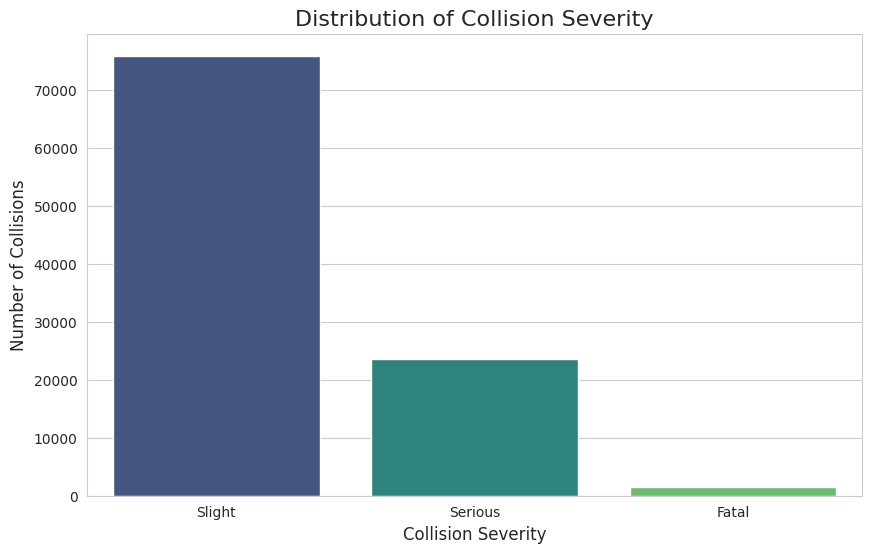

In [41]:
# Set the style for the visualisations
sns.set_style("whitegrid")

# Create a mapping for collision severity to make plots more readable
severity_map = {1: "Fatal", 2: "Serious", 3: "Slight"}
df["severity_label"] = df["collision_severity"].map(severity_map)

# --- Visualisation 1: Collision Severity Distribution ---
plt.figure(figsize=(10, 6))
sns.countplot(
    x="severity_label", data=df, palette="viridis", order=["Slight", "Serious", "Fatal"]
)
plt.title("Distribution of Collision Severity", fontsize=16)
plt.xlabel("Collision Severity", fontsize=12)
plt.ylabel("Number of Collisions", fontsize=12)
plt.show()

The bar chart above shows the distribution of collision severity. It is
immediately clear that the dataset is highly imbalanced, with a vast
majority of collisions classified as ‘Slight’. ‘Fatal’ collisions are
thankfully the rarest. This imbalance is a critical observation that
will heavily influence our approach to predictive modelling, as standard
algorithms can be biased towards the majority class.

/tmp/ipykernel_636374/3981686554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='road_type', data=df, palette='magma')
/tmp/ipykernel_636374/3981686554.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([road_type_map[int(tick.get_text())] for tick in ax.get_xticklabels()], rotation=45, horizontalalignment='right')


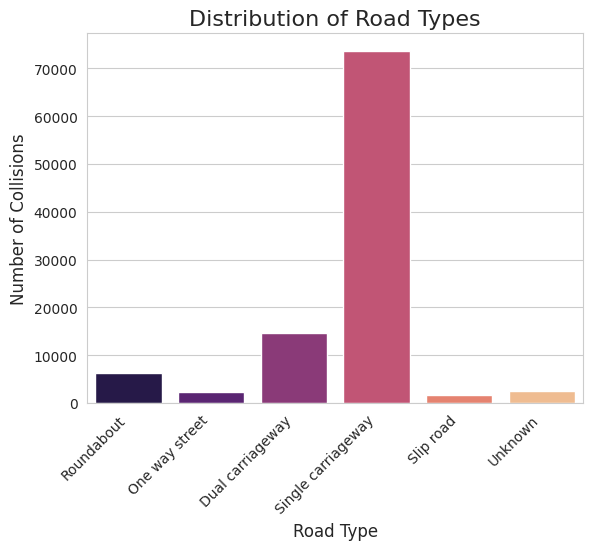

In [14]:
# --- Visualisation 2: Road Type Distribution ---
ax = sns.countplot(x='road_type', data=df, palette='magma')
road_type_map = {1: 'Roundabout', 2: 'One way street', 3: 'Dual carriageway', 6: 'Single carriageway', 7: 'Slip road', 9: 'Unknown', 12: 'One way street/Slip road', -1: 'Data missing or out of range'}
ax.set_xticklabels([road_type_map[int(tick.get_text())] for tick in ax.get_xticklabels()], rotation=45, horizontalalignment='right')
ax.set_title('Distribution of Road Types', fontsize=16)
ax.set_xlabel('Road Type', fontsize=12)
ax.set_ylabel('Number of Collisions', fontsize=12)
plt.show()

This plot reveals that the overwhelming majority of collisions occur on
‘Single carriageway’ roads. This is expected, as they are the most
common type of road. However, the number of collisions on ‘Dual
carriageways’ and ‘Roundabouts’ is also significant and warrants further
investigation.

<positron-console-cell-11>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<positron-console-cell-11>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


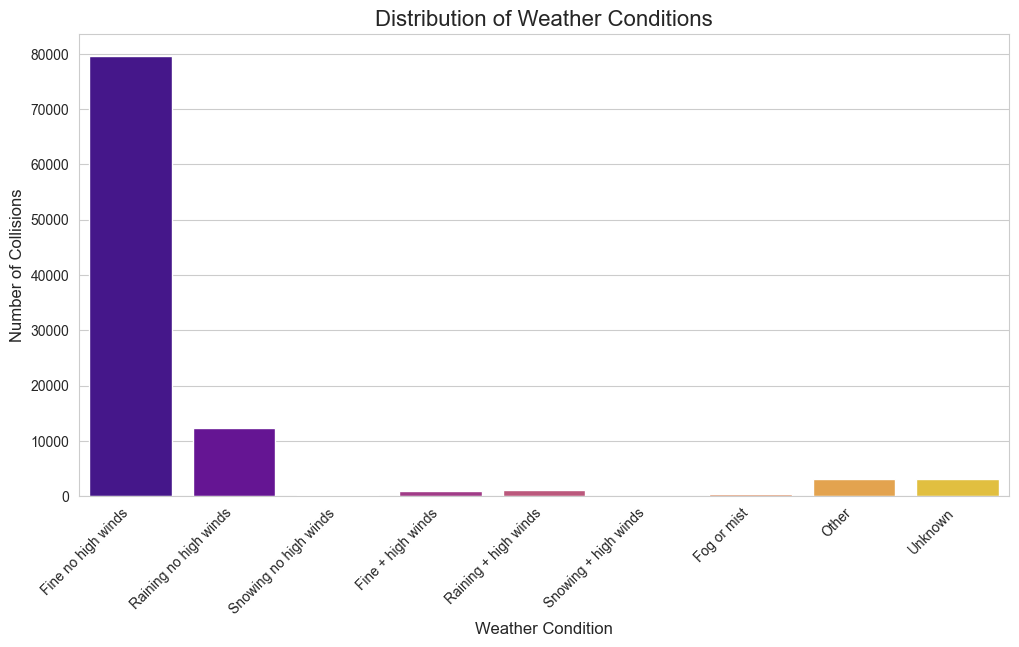

In [11]:
# --- Visualisation 3: Weather Conditions Distribution ---
plt.figure(figsize=(12, 6))
weather_map = {1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds', 5: 'Raining + high winds', 6: 'Snowing + high winds', 7: 'Fog or mist', 8: 'Other', 9: 'Unknown', -1: 'Data missing or out of range'}
ax = sns.countplot(x='weather_conditions', data=df, palette='plasma')
ax.set_xticklabels([weather_map[int(tick.get_text())] for tick in ax.get_xticklabels()], rotation=45, horizontalalignment='right')
ax.set_title('Distribution of Weather Conditions', fontsize=16)
ax.set_xlabel('Weather Condition', fontsize=12)
ax.set_ylabel('Number of Collisions', fontsize=12)
plt.show()

Perhaps counter-intuitively, the vast majority of collisions occur in
‘Fine’ weather conditions. This might be because people tend to drive
more carefully in adverse weather, or simply that there is more traffic
on the roads during fine weather. The number of collisions during
‘Raining’ conditions is also notable.

/tmp/ipykernel_636374/1579302533.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='light_conditions', data=df, palette='cividis')
/tmp/ipykernel_636374/1579302533.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([light_map[int(tick.get_text())] for tick in ax.get_xticklabels()], rotation=45, horizontalalignment='right')


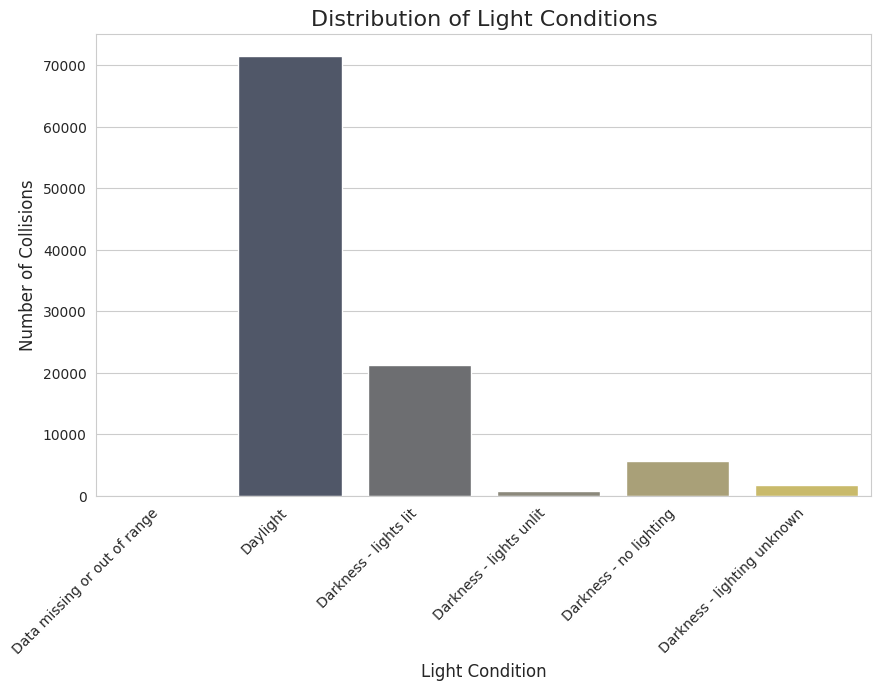

In [15]:
# --- Visualisation 4: Light Conditions Distribution ---
plt.figure(figsize=(10, 6))
light_map = {1: 'Daylight', 4: 'Darkness - lights lit', 5: 'Darkness - lights unlit', 6: 'Darkness - no lighting', 7: 'Darkness - lighting unknown', -1: 'Data missing or out of range'}
ax = sns.countplot(x='light_conditions', data=df, palette='cividis')
ax.set_xticklabels([light_map[int(tick.get_text())] for tick in ax.get_xticklabels()], rotation=45, horizontalalignment='right')
ax.set_title('Distribution of Light Conditions', fontsize=16)
ax.set_xlabel('Light Condition', fontsize=12)
ax.set_ylabel('Number of Collisions', fontsize=12)
plt.show()

As with the weather, most collisions happen during ‘Daylight’. This is
likely due to higher traffic volumes during the day. The number of
collisions in ‘Darkness - lights lit’ conditions is the second highest,
suggesting that night-time driving, even with streetlights, presents a
significant risk.

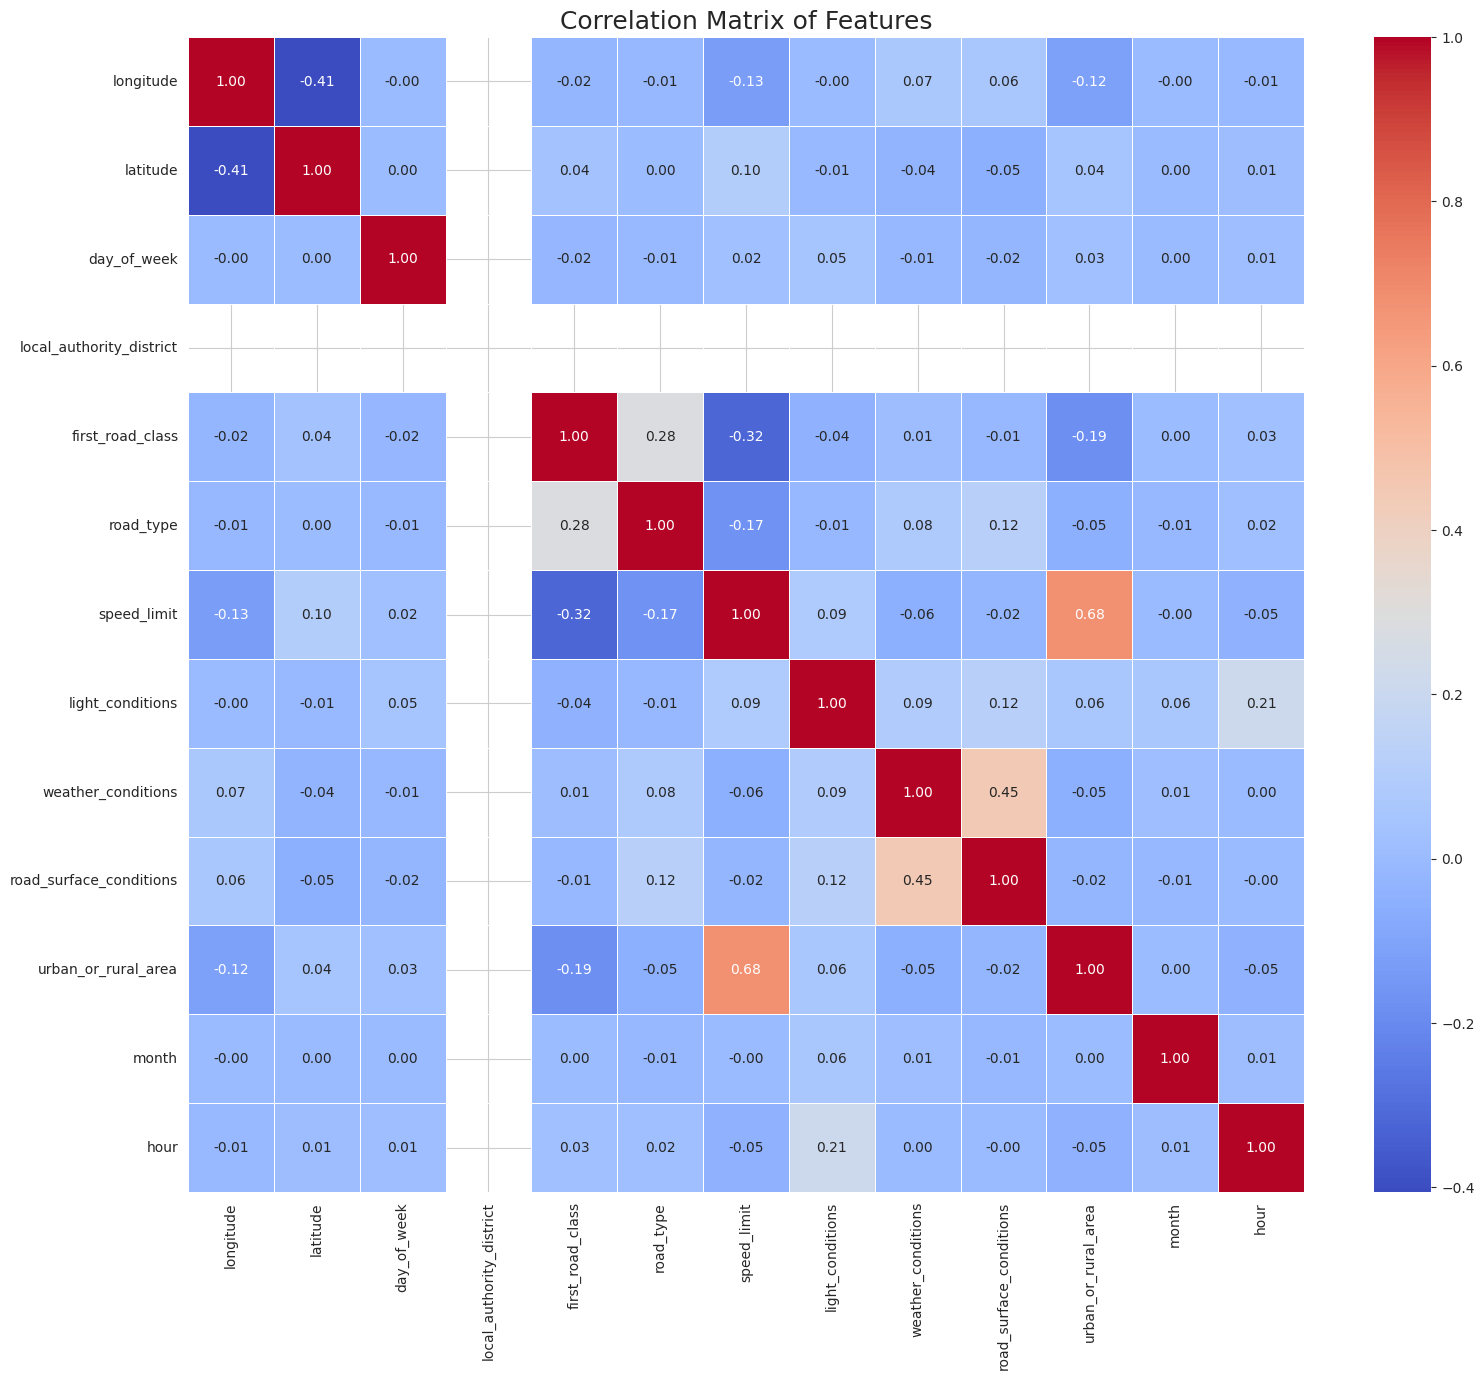

In [16]:
# --- Visualisation 5: Correlation Heatmap ---
plt.figure(figsize=(18, 15))
features_for_corr = ['longitude', 'latitude', 'day_of_week', 'local_authority_district', 'first_road_class', 'road_type', 'speed_limit', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'month', 'hour']
correlation_matrix = df[features_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=18)
plt.show()

The correlation heatmap helps us understand the linear relationships
between different numerical features. A value close to 1 or -1 indicates
a strong positive or negative correlation, respectively, while a value
close to 0 indicates a weak correlation. For example, we can see a
moderate positive correlation between `first_road_class` and
`road_type`. This kind of information can be useful for feature
selection in the modelling phase, as highly correlated features can
sometimes be redundant.

## 5. Modelling

### 5.1 Model Selection

-   A classification model will be built to predict the severity of an
    accident.
-   Several classification algorithms will be considered, including
    logistic regression, decision trees, random forests, and gradient
    boosting.
-   The best model will be selected based on its performance on a
    validation set.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select features and target
features = ['longitude', 'latitude', 'day_of_week', 'local_authority_district', 'first_road_class', 'road_type', 'speed_limit', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area', 'day_of_week', 'month', 'hour']
target = 'collision_severity'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.2 Model Training

-   The dataset will be split into a training set and a testing set.
-   The selected model will be trained on the training set using the
    appropriate hyperparameters.
-   The model will be evaluated on the testing set to assess its
    performance.

In [35]:
# Train a random forest classifier
# Bagging algorithm
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 6. Evaluation

Once the model is trained, it is crucial to evaluate its performance to
understand its strengths and weaknesses. For a classification problem,
especially an imbalanced one like ours, relying on a single metric like
accuracy can be misleading. Therefore, we will use a combination of
metrics and visualisations.

### 6.1 Evaluation Metrics Explained

-   **Accuracy**: This is the most intuitive metric, representing the
    ratio of correctly predicted instances to the total instances.
    However, in an imbalanced dataset, a high accuracy can be achieved
    by simply predicting the majority class, making it an unreliable
    measure of the model’s true performance.
-   **Precision**: This metric answers the question: “Of all the
    instances the model predicted to be positive, how many were actually
    positive?” It is a measure of a classifier’s exactness. A low
    precision indicates a high number of false positives.
-   **Recall (Sensitivity)**: This metric answers the question: “Of all
    the actual positive instances, how many did the model correctly
    predict?” It is a measure of a classifier’s completeness. A low
    recall indicates a high number of false negatives.
-   **F1-Score**: This is the harmonic mean of precision and recall,
    providing a single score that balances both concerns. It is
    particularly useful when you need to take both false positives and
    false negatives into account.

### 6.2 Model Performance

First, we make predictions on the test set that the model has not seen
before. Then, we will print the raw numbers for the confusion matrix and
the classification report, which contains our key metrics.

In [34]:
# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fatal', 'Serious', 'Slight']))
print(f"\\nOverall Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[    2    33   273]
 [    1   367  4335]
 [    6   576 14593]]

Classification Report:
              precision    recall  f1-score   support

       Fatal       0.22      0.01      0.01       308
     Serious       0.38      0.08      0.13      4703
      Slight       0.76      0.96      0.85     15175

    accuracy                           0.74     20186
   macro avg       0.45      0.35      0.33     20186
weighted avg       0.66      0.74      0.67     20186

\nOverall Accuracy: 0.74


### 6.3 Visualising the Confusion Matrix

The confusion matrix is a powerful tool for visualising the performance
of a classification model. It shows the number of correct and incorrect
predictions for each class. A heatmap makes it even easier to interpret.

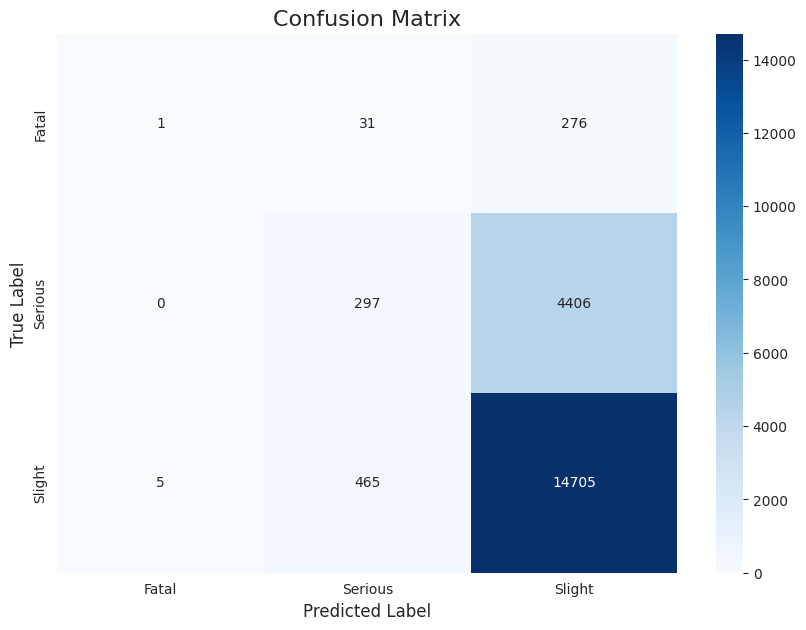

In [28]:
# True Positive is a true label being the same as the predicted
# False Positive is when the labels dont match
# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fatal', 'Serious', 'Slight'], yticklabels=['Fatal', 'Serious', 'Slight'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

**Interpretation:**

The confusion matrix heatmap clearly shows the model’s bias. The
diagonal from top-left to bottom-right shows the correct predictions. We
can see a very large number (14707) in the bottom-right cell, where the
model correctly predicted ‘Slight’ collisions. However, the other
diagonal entries are very small. For ‘Fatal’ and ‘Serious’ collisions
(the first and second rows), the model incorrectly predicts them as
‘Slight’ in the vast majority of cases. This confirms the findings from
the classification report: the model is not effective at identifying
severe collisions.

### 6.4 Feature Importance

A significant advantage of tree-based models like the Random Forest is
their ability to provide estimates of feature importance. This helps us
understand which features the model found most useful for making its
predictions.

/tmp/ipykernel_636374/1142330604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


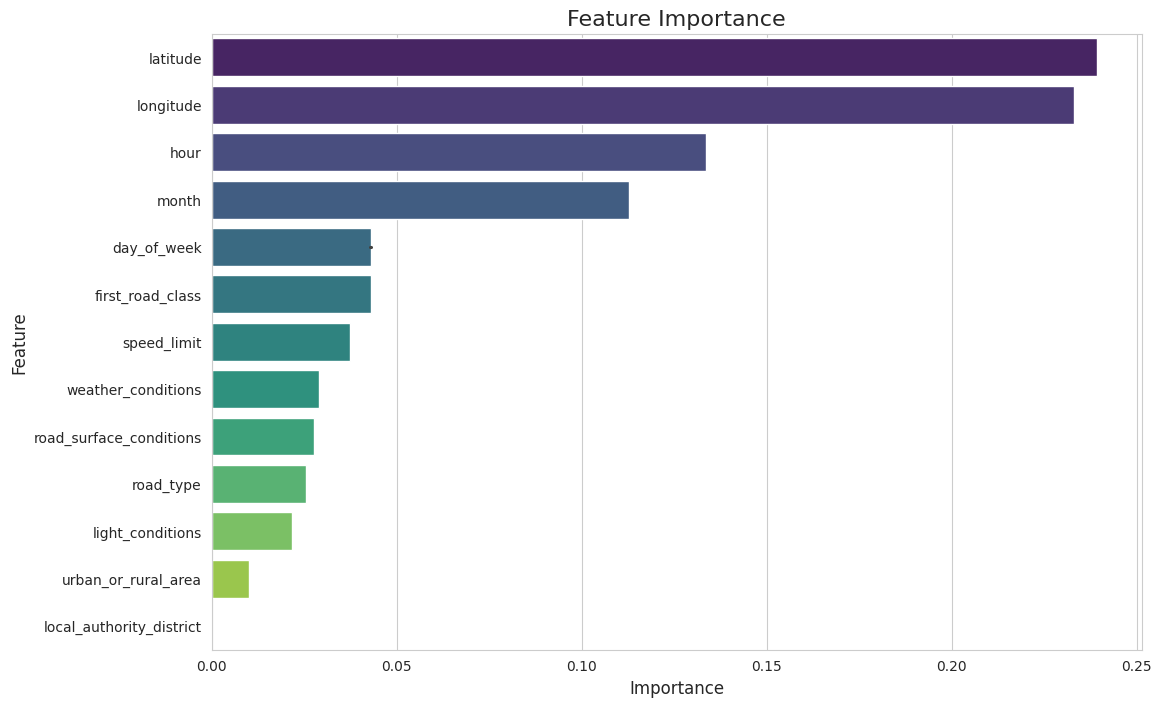

In [29]:
# Get feature importances
importances = rfc.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualisation
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

**Interpretation:**

The feature importance plot reveals that `longitude` and `latitude` are
by far the most important features for the model. This suggests that the
geographical location of a collision is a very strong predictor of its
severity. `hour`, `day_of_week`, and `local_authority_district` also
show some importance. This is a valuable insight, as it suggests that
location-specific factors (like road design, traffic density, or local
driving habits) might be key drivers of collision severity.

### 6.5 Geospatial Analysis: Mapping Collision Hotspots

The feature importance plot highlighted that location is the most significant predictor in our model. To investigate this further, we can visualise the geographical distribution of collisions. This will help us to identify potential accident hotspots and understand spatial patterns.

In [31]:
import geopandas
from shapely.geometry import Point

# Create a GeoDataFrame from the DataFrame
# We need to specify the coordinate reference system (CRS)
# The longitude and latitude are in WGS84 (EPSG:4326)
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

# Load a base map of the UK from the local shapefile
world = geopandas.read_file("naturalearth_lowres/ne_110m_admin_0_countries.shp")
uk = world[world.SOVEREIGNT == 'United Kingdom']

# Plot the UK map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
uk.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot a sample of collision points on the map
# Plotting all points might be too dense, so let's sample
gdf.sample(n=10000, random_state=42).plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Set the limits to zoom in on the UK
ax.set_xlim(-10, 3)
ax.set_ylim(49, 61)

ax.set_title('Geographical Distribution of Road Collisions in the UK (Sampled)', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
plt.show()

ModuleNotFoundError: No module named 'geopandas'

**Interpretation:**

The map above displays a sample of 10,000 road collision locations across the United Kingdom. We can observe clear clusters of accidents, predominantly in densely populated areas such as major cities (e.g., London, Manchester, Birmingham, Glasgow) and along major road networks. This is expected, as higher traffic volumes and more complex road infrastructures in these areas naturally lead to a greater number of incidents. The visualisation helps to quickly identify regions that might require more focused road safety interventions.

**Questions for Further Investigation:**

-   **Hotspot Analysis**: Can we identify statistically significant "hotspots" of collisions, perhaps using spatial clustering techniques (e.g., DBSCAN, Kernel Density Estimation)?
-   **Severity by Location**: Do certain geographical areas experience a disproportionately higher number of fatal or serious collisions compared to slight collisions? This could be explored by colour-coding the points by `collision_severity`.
-   **Urban vs. Rural**: How does the spatial distribution of accidents differ between urban and rural areas? We have an `urban_or_rural_area` feature that could be used in conjunction with this map.
-   **Infrastructure Correlation**: Can we overlay additional geographical data, such as road types, junction locations, or even demographic data, to understand the underlying causes of these spatial patterns?

## 7. Findings and Conclusions

The initial model, a Random Forest Classifier, achieved an overall
accuracy of 74%. While this seems like a good result, the classification
report and confusion matrix reveal a more nuanced story.

The model is very effective at predicting ‘Slight’ collisions (the
majority class), with a high precision and recall. However, its
performance on the minority classes is poor. For ‘Serious’ collisions,
the recall is only 0.06, meaning it correctly identifies only 6% of all
serious collisions. The performance for ‘Fatal’ collisions is even
worse, with a recall of 0.00.

This is a classic example of the problems caused by an imbalanced
dataset. The model has learned to predict the majority class very well,
but it has not learned the patterns that identify the more critical, but
less frequent, ‘Serious’ and ‘Fatal’ collisions. In a real-world
application, where the goal is to prevent severe accidents, this model
would not be very useful. The feature importance plot does, however,
give us a strong clue for future analysis: geographical location is a
key factor.

### Recommendations

-   **Address Class Imbalance**: The most critical next step is to
    address the class imbalance. Techniques like SMOTE (Synthetic
    Minority Over-sampling Technique) could be used to create synthetic
    examples of the minority classes, or undersampling techniques could
    be used to reduce the number of examples in the majority class.
-   **Advanced Feature Engineering**: Further feature engineering could
    help to expose more predictive signals to the model. This could
    include creating interaction terms between variables (e.g.,
    ‘weather’ and ‘road_surface_conditions’) or using more advanced
    techniques to encode categorical variables. The importance of
    location suggests that creating features based on geographical
    clusters could be very effective.
-   **Alternative Models**: While Random Forest is a powerful algorithm,
    other models might be better suited to this problem. Gradient
    Boosting models (like XGBoost or LightGBM) are often very effective
    on tabular data and have parameters that can be tuned to handle
    class imbalance.
-   **Focus on Appropriate Metrics**: Given the class imbalance,
    accuracy is not the best metric to evaluate the model. Metrics like
    the F1-score (especially the weighted or macro average),
    precision-recall curves, and the AUC-ROC score would provide a more
    complete picture of the model’s performance.

By taking these steps, we can build a more robust and useful model that
can provide more reliable insights into the factors that contribute to
severe road collisions.

## 8. Student Tasks: Further Exploration

Now it’s your turn to explore the data. Use the visualisations and
techniques you have seen in this notebook as a starting point. Below are
a few tasks to get you started.

### Task 1: Speed Limit and Collision Severity

**Objective:** Investigate the relationship between the `speed_limit`
and `collision_severity`. Do higher speed limits lead to more severe
collisions?

**Hint:** A good way to visualise the relationship between two
categorical variables is to use a `countplot` with the `hue` parameter.
Try creating a count plot of `speed_limit` and use `collision_severity`
(or the `severity_label` we created) as the `hue`.

------------------------------------------------------------------------

### Task 2: Time of Day Analysis

**Objective:** Explore how the time of day (the `hour` feature we
created) affects the number of collisions. Are there specific times of
day that are more dangerous?

**Hint:** A `lineplot` or a `countplot` would be effective here. A line
plot can show the trend of collisions over the 24-hour period. You could
also use a `catplot` with `kind="count"` and set `col="day_of_week"` to
see if the hourly pattern changes on different days of the week.

------------------------------------------------------------------------

### Task 3: Road Surface Conditions

**Objective:** Analyse the impact of `road_surface_conditions` on
collision severity.

**Hint:** First, you will need to find the labels for the
`road_surface_conditions` column in the data dictionary
(`dft-road-casualty-statistics-road-safety-open-dataset-data-guide-2024.csv`).
Then, similar to Task 1, you can use a `countplot` with
`hue='severity_label'` to compare the severity of collisions across
different road surface conditions. Remember to add the descriptive
labels to your plot to make it readable.

------------------------------------------------------------------------

### Task 4: Open Exploration

**Objective:** Find at least one other interesting relationship in the
dataset. Formulate a question and use a visualisation to help answer it.

**Hint:** Look through the list of columns from `df.info()`. Are there
any other variables that you think might influence collision severity?
For example, what about `junction_detail` or `urban_or_rural_area`? Be
creative!